In [67]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


# Begin by importing all necessary libraries
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [68]:
#reading the train set
spamData = pd.read_csv('G:/Documents/DataScience/R SPAM Detection ex 3.17/spambase.data.csv')
spamData.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_2,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,spam_or_non_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [69]:
X = spamData.iloc[:, :-1].values
y = spamData.iloc[:, 57].values

df = pd.DataFrame()

In [84]:
from sklearn import linear_model
reg_lasso = linear_model.LassoLars(alpha=0.01)
reg_lasso.fit(X, y)
LassoLars(alpha=0.3)
print(reg_lasso.coef_)

df['Lasso'] = reg_lasso.coef_

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [85]:
df['Lasso'].head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Lasso, dtype: float64

In [83]:
red_Lasso = reg_lasso.predict(X)
rezult = pd.DataFrame(red_Lasso)
rezult.to_csv('LassoPRED.csv', index=False)

In [87]:
red_Lasso

array([0.39404477, 0.39404477, 0.39404477, ..., 0.39404477, 0.39404477,
       0.39404477])

In [90]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2788    0]
 [   0 1813]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2788
           1       1.00      1.00      1.00      1813

    accuracy                           1.00      4601
   macro avg       1.00      1.00      1.00      4601
weighted avg       1.00      1.00      1.00      4601



In [91]:
from sklearn.linear_model import LogisticRegression

logreg_clf = LogisticRegression()

In [92]:
logreg_clf.fit(X, y)

C:\Users\Ahriman\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [93]:
print(logreg_clf.coef_)

lrg = logreg_clf.coef_

[[-7.50988186e-02 -1.67930179e-01  1.70263602e-01  2.47630509e-01
   8.78738722e-01  5.13888186e-01  1.19710863e+00  7.87904774e-01
   3.13021424e-01  2.35220339e-01  1.34185167e-01 -2.13154072e-02
   1.55852045e-01  7.38614291e-02  2.57422670e-01  1.16689546e+00
   7.41880414e-01  4.26032976e-01 -3.77834775e-02  4.91414352e-01
   2.83088353e-01  2.31723127e-01  1.04353651e+00  5.91328828e-01
  -2.59841724e+00 -1.26890132e+00 -3.42811645e+00 -2.52188219e-01
  -6.02091580e-01 -4.66154690e-01 -3.60157987e-01 -2.19967617e-01
  -6.56880036e-01 -2.23505458e-01 -5.62858406e-01 -1.23428553e-01
  -4.96566904e-01 -1.34224778e-01 -4.61271841e-01 -2.27791527e-01
  -3.65521219e-01 -9.47169801e-01 -2.67215365e-01 -5.94974556e-01
  -8.68873214e-01 -1.29596391e+00 -7.55076798e-02 -3.03186641e-01
  -4.08369390e-01 -2.05078175e-01 -1.05688115e-01  6.36400426e-01
   7.51619181e-01  2.12059394e-01 -9.38211977e-03  8.02924449e-03
   5.28061526e-04]]


In [94]:
pred_lgr = logreg_clf.predict(X)

In [97]:
print(pred_lgr)

[1 1 1 ... 0 0 0]


In [98]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, pred_lgr))
print(classification_report(y, pred_lgr))

[[2624  164]
 [ 181 1632]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2788
           1       0.91      0.90      0.90      1813

    accuracy                           0.93      4601
   macro avg       0.92      0.92      0.92      4601
weighted avg       0.92      0.93      0.92      4601



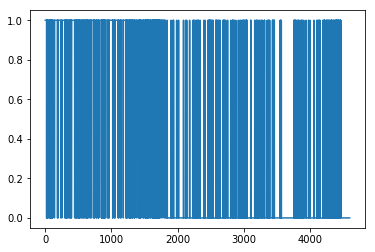

In [101]:
plt.plot(pred_lgr)
plt.show()

In [102]:

from sklearn.linear_model import RidgeClassifier

clf_Ridge = RidgeClassifier().fit(X, y)
clf_Ridge.score(X, y)



0.8880678113453597

In [103]:
print(clf_Ridge.coef_)

[[-9.91015977e-02 -2.40772265e-02  7.84548923e-02  2.38435361e-02
   1.68416180e-01  2.37205893e-01  4.25428478e-01  1.87845270e-01
   1.44607879e-01  3.01745213e-02  1.13287329e-01 -5.57068038e-02
   2.41026302e-02  9.60189688e-03  3.75068166e-02  1.50165794e-01
   1.03563728e-01  1.10709482e-01  2.83075067e-02  1.23433198e-01
   1.05448205e-01  8.94023620e-02  3.49297216e-01  1.81610144e-01
  -4.63757306e-02 -4.33575468e-02 -2.44025386e-02  7.86807077e-03
  -1.48331338e-02 -1.03535005e-01 -4.62826488e-02  2.76413157e-02
  -8.39994632e-02  8.70555579e-02 -6.23108957e-02  5.28203197e-02
  -6.64404704e-02 -1.06367773e-01 -3.96255504e-02  8.11335373e-02
  -1.68376552e-02 -7.39108867e-02 -1.26178936e-01 -6.47500043e-02
  -7.05142189e-02 -7.56303801e-02 -3.76337242e-01 -1.16157492e-01
  -2.79001286e-01 -1.19443271e-01 -1.15948960e-01  1.36165757e-01
   4.64791763e-01  5.53400535e-02  4.67924597e-04  1.33412139e-04
   1.59866166e-04]]


In [104]:
pred_RIDGE = clf_Ridge.predict(X)

In [105]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, pred_RIDGE))
print(classification_report(y, pred_RIDGE))

[[2665  123]
 [ 392 1421]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2788
           1       0.92      0.78      0.85      1813

    accuracy                           0.89      4601
   macro avg       0.90      0.87      0.88      4601
weighted avg       0.89      0.89      0.89      4601



In [106]:
from sklearn.cross_decomposition import PLSRegression

pls2 = PLSRegression(n_components=2)
pls2.fit(X, y)
PLSRegression()
y_pred_PLS = pls2.predict(X)

In [113]:
y_pred_PLS.mean()

0.39404477287546186

In [114]:
y_pred_PLS.size

4601

In [129]:
temp = []

for i in range(4601):
    if (y_pred_PLS[i]<0.4): 
        temp.append(0) 
    else: 
        temp.append(1)
            
    #temp[i].append(if (temp[i]<0.4): 0 else: 1 )
    
temp    

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [130]:


print(pls2.coef_)

[[ 0.0115479 ]
 [-0.00703246]
 [ 0.02711254]
 [ 0.0109863 ]
 [ 0.04056712]
 [ 0.03469544]
 [ 0.05743379]
 [ 0.03262819]
 [ 0.03095666]
 [ 0.01843312]
 [ 0.03094503]
 [-0.00544997]
 [ 0.01658586]
 [ 0.00708892]
 [ 0.02562891]
 [ 0.04534807]
 [ 0.0385617 ]
 [ 0.03133431]
 [ 0.03755778]
 [ 0.02927141]
 [ 0.05729706]
 [ 0.01884682]
 [ 0.0516232 ]
 [ 0.03322837]
 [-0.02873371]
 [-0.02374127]
 [-0.02873981]
 [-0.00596089]
 [-0.00655467]
 [-0.00788103]
 [ 0.00093071]
 [ 0.006591  ]
 [-0.01982716]
 [ 0.00676011]
 [-0.00625027]
 [ 0.00092815]
 [-0.02435992]
 [-0.00601867]
 [-0.01655488]
 [ 0.01246781]
 [-0.0141635 ]
 [-0.02208512]
 [-0.0171074 ]
 [-0.0156643 ]
 [-0.02411445]
 [-0.02526125]
 [-0.00876651]
 [-0.01425351]
 [-0.01138096]
 [-0.0070062 ]
 [-0.00847696]
 [ 0.03980586]
 [ 0.05023495]
 [ 0.01203165]
 [ 0.0143494 ]
 [ 0.02894187]
 [ 0.0367956 ]]


In [131]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y, temp))
print(classification_report(y, temp))

[[2538  250]
 [ 218 1595]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      2788
           1       0.86      0.88      0.87      1813

    accuracy                           0.90      4601
   macro avg       0.89      0.90      0.89      4601
weighted avg       0.90      0.90      0.90      4601



In [52]:
import numpy as np
from sklearn.decomposition import PCA

pca_model = PCA(n_components=2)
pca_model.fit(X)
PCA(n_components=2)
print(pca.explained_variance_ratio_)

print(pca.singular_values_)


[0.92702701 0.07104297]
[41644.03584425 11528.35073608]


In [53]:
###   TODO
print(pca.coef_)

AttributeError: 'PCA' object has no attribute 'coef_'

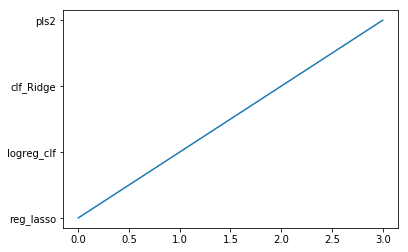

In [54]:
plt.plot(['reg_lasso', 'logreg_clf', 'clf_Ridge', 'pls2'])
plt.show()

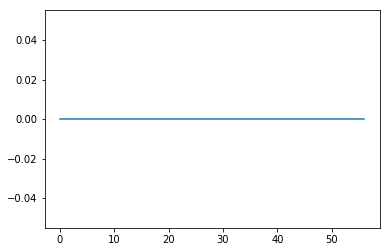

In [55]:
#reg_lasso.coef_, logreg_clf.coef_, clf_Ridge.coef_, pls2.coef_

plt.plot(reg_lasso.coef_)
plt.show()

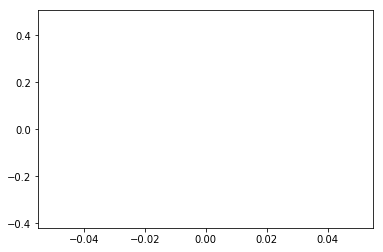

In [134]:
#reg_lasso.coef_, logreg_clf.coef_, clf_Ridge.coef_, pls2.coef_

plt.plot(clf_Ridge.coef_)
plt.show()